In [3]:
!pip install netCDF4 gdown
import netCDF4
import os
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import gdown
from datetime import datetime, timedelta


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.0 MB/s eta 0:00:00
Mounted at /content/drive


In [4]:

# Define the Google Drive file ID and the output file path
file_id = "1o9jrAMlFyHWIBwXSyuspN5ihBWi51uEx"
output_file_path = "/content/19930101.nc"

In [5]:
# Download the file from Google Drive
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1o9jrAMlFyHWIBwXSyuspN5ihBWi51uEx
To: /content/19930101.nc
100%|██████████| 247k/247k [00:00<00:00, 5.32MB/s]


'/content/19930101.nc'

In [6]:
# Open the .nc file
dataset = netCDF4.Dataset(output_file_path, mode="r")

In [7]:
print(dataset)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    cdm_data_type: Grid
    comment: Sea Surface Height measured by Altimetry and derived variables
    contact: http://climate.copernicus.eu/c3s-user-service-desk
    creator_email: http://climate.copernicus.eu/c3s-user-service-desk
    creator_name: Copernicus Climate Change Service (C3S)
    creator_url: http://climate.copernicus.eu
    date_created: 2021-07-09T08:53:57Z
    date_issued: 2021-07-09T08:53:57Z
    date_modified: 2021-07-09T08:53:57Z
    geospatial_lat_max: 89.875
    geospatial_lat_min: -89.875
    geospatial_lat_resolution: 0.25
    geospatial_lat_units: degrees_north
    geospatial_lon_max: 179.875
    geospatial_lon_min: -179.875
    geospatial_lon_resolution: 0.25
    geospatial_lon_units: degrees_east
    geospatial_vertical_max: 0.0
    geospatial_vertical_min: 0.0
    geospatial_vertical_positive: down
   

In [8]:
output_file_path = r"./19930101_info.txt"
# Save detailed information about the contents of the file to a text file
with open(output_file_path, "w") as f:
    f.write(str(dataset))

# Ensure the file is saved to the correct path in Google Colab
# files.download(output_file_path)

In [9]:
# Extract the 'sla' (Sea level Anomaly) variable
sla = dataset.variables["sla"][:]
print(sla)

[[[-- -- -- ... -0.0594 -0.062400000000000004 -0.066]
  [-- -- -- ... -0.051300000000000005 -0.0579 -0.0623]
  [-- -- -- ... -0.0506 -0.057800000000000004 -0.0625]
  ...
  [-- -- -- ... -0.007200000000000001 -0.015000000000000001
   -0.023100000000000002]
  [-- -- -- ... -0.0048000000000000004 -0.010100000000000001 -0.0176]
  [-- -- -- ... -0.0091 -0.009300000000000001 -0.0176]]]


In [41]:
#pd.DataFrame(dataset.variables)["sla"][7:]

In [11]:
# Calculate and print the max of all values stored in sla
max_sla = np.max(sla)
print(f"Maximum SLA: {max_sla}")

Maximum SLA: 0.7465


In [12]:
# Calculate and print the min of all values stored in sla
min_sla = np.min(sla)
print(f"Minimum SLA: {min_sla}")

Minimum SLA: -0.6945


In [13]:
# Calculate and print the average of all values stored in sla
average_sla = np.mean(sla)
print(f"Average SLA: {average_sla}")

Average SLA: -0.0027686967632027265


In [14]:
# Extract the latitude and longitude
latitude = dataset.variables["latitude"][:]
longitude = dataset.variables["longitude"][:]

In [15]:
# Close the dataset
dataset.close()

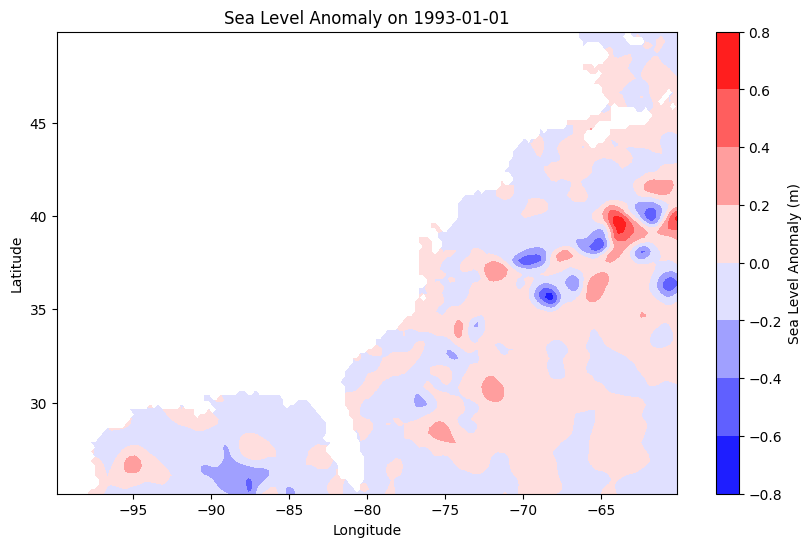

In [16]:
# Create a meshgrid for plotting
lon, lat = np.meshgrid(longitude, latitude)

# Plot the 'sla' variable
plt.figure(figsize=(10, 6))
plt.contourf(lon, lat, sla[0, :, :], cmap="bwr")
plt.colorbar(label="Sea Level Anomaly (m)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sea Level Anomaly on 1993-01-01")
plt.show()

## Update paths below to run on Local

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Define the directory containing the .nc files
directory = r"/content/drive/MyDrive/Copernicus_ENA_Satelite_Maps_Training_Data"

In [19]:
# Initialize a list to store the results
results = []

In [42]:
# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        file_path = os.path.join(directory, filename)

        # Extract the date part from the filename and format it
        date_str = (filename.split(".")[0]).split('_')[2]
        if len(date_str) == 8:
            formatted_date = f"{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}"

            # Open the .nc file
            dataset = netCDF4.Dataset(file_path, mode="r")

            # Extract the 'sla' variable
            sla = dataset.variables["sla"][:]

            # Calculate the average of all values stored in sla
            average_sla = np.mean(sla)

            # Determine the value for the additional columns
            value = 1 if average_sla >= 0 else 0

            # Append the result to the list
            results.append([formatted_date, average_sla] + [value] * 12)

            # latitude = dataset.variables["latitude"][:]
            # longitude = dataset.variables["longitude"][:]

            # # Create a meshgrid for plotting
            # lon, lat = np.meshgrid(longitude, latitude)

            # # Plot the 'sla' variable
            # plt.figure(figsize=(10, 6))
            # plt.contourf(lon, lat, sla[0, :, :], cmap="bwr")
            # plt.colorbar(label="Sea Level Anomaly (m)")
            # plt.xlabel("Longitude")
            # plt.ylabel("Latitude")
            # plt.title(f"Sea Level Anomaly on {formatted_date}")
            # plt.show()


            # Close the dataset
            dataset.close()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Copernicus_ENA_Satelite_Maps_Training_Data'

In [36]:
# Create a DataFrame from the results
columns = [
    "Date",
    "Average_SLA",
    "Atlantic City",
    "Baltimore",
    "Eastport",
    "Fort Pulaski",
    "Lewes",
    "New London",
    "Newport",
    "Portland",
    "Sandy Hook",
    "Sewells Point",
    "The Battery",
    "Washington",
]
results_df = pd.DataFrame(results, columns=columns)

In [22]:
# Define the path to the output CSV file
output_csv_path = r"/content/drive/MyDrive/sla.csv"

In [23]:
# Remove the Average_SLA column
# results_df = results_df.drop(columns=["Average_SLA"])

In [24]:
# Save the DataFrame to a CSV file
results_df.to_csv(output_csv_path, index=False)

In [25]:
results_df

,Date,Average_SLA,Atlantic City,Baltimore,Eastport,Fort Pulaski,Lewes,New London,Newport,Portland,Sandy Hook,Sewells Point,The Battery,Washington


In [43]:
sla_data = pd.read_csv('/content/sla_data.csv')
sla_data

FileNotFoundError: [Errno 2] No such file or directory: '/content/sla_data.csv'

In [27]:
nc_directory = r"/content/drive/MyDrive/Training_Anomalies_Station_Data"

In [44]:
filepaths = [os.path.join(nc_directory, filename) for filename in os.listdir(nc_directory) if filename.endswith('.csv')]
df = pd.concat((pd.read_csv(filepath) for filepath in filepaths), ignore_index=True)

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df_location_encoded = pd.get_dummies(df['location'], prefix='location')

# Convert 't' column to datetime (if it isn't already)
df['t'] = pd.to_datetime(df['t'])

# Extract useful time features and one-hot encode them
# Let's extract year, month, and day (or adjust as per your need)
df['year'] = df['t'].dt.year
df['month'] = df['t'].dt.month
df['day'] = df['t'].dt.day

# One-hot encode the 'year', 'month', and 'day' columns
df_time_encoded = pd.get_dummies(df[['year', 'month', 'day']])

# Drop the original 't' and 'location' columns after encoding
df = df.drop(columns=['t', 'location'])

# Now, concatenate the encoded features to the original dataframe
df = pd.concat([df, df_location_encoded, df_time_encoded], axis=1)

# Assuming the 'anomaly' column contains 0 for normal and 1 for anomalous
X = df.drop(columns=['anomaly'])
y = df['anomaly']

# Normalize the data (for numerical columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [46]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9430 - loss: 0.2038 - val_accuracy: 0.9454 - val_loss: 0.1912
Epoch 2/10
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9472 - loss: 0.1859 - val_accuracy: 0.9454 - val_loss: 0.1881
Epoch 3/10
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9469 - loss: 0.1861 - val_accuracy: 0.9454 - val_loss: 0.1873
Epoch 4/10
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9465 - loss: 0.1861 - val_accuracy: 0.9454 - val_loss: 0.1871
Epoch 5/10
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9479 - loss: 0.1815 - val_accuracy: 0.9454 - val_loss: 0.1862
Epoch 6/10
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9482 - loss: 0.1794 - val_accuracy: 0.9454 - val_loss: 0.1861
Epoch 7/10
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9474 - loss: 0.1806 - val_accuracy: 0.9454 - val_loss: 0.1848
Epoch 8/10
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9493 - loss: 0.1755 -

In [48]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict anomalies on new data
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary output

# Show predicted anomalies
anomalies_df = pd.DataFrame(X_test)
anomalies_df['predicted_anomaly'] = y_pred
print(anomalies_df[anomalies_df['predicted_anomaly'] == 1])


581/581 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9423 - loss: 0.1915
Test Loss: 0.18274962902069092
Test Accuracy: 0.9453870058059692
581/581 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, predicted_anomaly]
Index: []

[0 rows x 21 columns]


In [50]:
#print out a dataframe of 0s and 1s with respect to actual labels
#comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
#print(comparison_df)

In [49]:
# Assuming you only have normal data (y = 0 for all samples)
normal_data = df[df['anomaly'] == 0].drop(columns=['anomaly'])

# Normalize the normal data
normal_data_scaled = scaler.fit_transform(normal_data)

# Train a simple DNN model on normal data
model = Sequential()
model.add(Dense(64, input_dim=normal_data_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(normal_data_scaled, np.zeros(len(normal_data_scaled)), epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2749/2749 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9908 - loss: 0.0326
Epoch 2/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 1.0000 - loss: 7.0538e-06
Epoch 3/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 1.0000 - loss: 1.0587e-06
Epoch 4/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 1.0000 - loss: 2.0926e-07
Epoch 5/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 1.0000 - loss: 4.5169e-08
Epoch 6/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 1.0000 - loss: 1.0287e-08
Epoch 7/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 1.0000 - loss: 2.5681e-09
Epoch 8/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 1.0000 - loss: 7.4783e-10
Epoch 9/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 1.0000 - loss: 2.6935e-10
Epoch 10/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 1.0000 - loss: 1.2179e-10


In [51]:
# Predict on new data
y_pred = model.predict(X_scaled)

# Set a threshold based on the predicted value (probability) or reconstruction error
threshold = 0.5  # Adjust based on results
anomalies = (y_pred > threshold).astype(int)

# Add anomaly labels to your data
df['anomaly'] = anomalies

# Display anomalies
anomalies_df = df[df['anomaly'] == 1]
print(anomalies_df)

2902/2902 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Empty DataFrame
Columns: [anomaly, latitude, longitude, year, month, day, location_Atlantic City, location_Baltimore, location_Eastport, location_Fort Pulaski, location_Lewes, location_New London, location_Newport, location_Portland, location_Sandy Hook, location_Sewells Point, location_The Battery, location_Washington, year, month, day]
Index: []

[0 rows x 21 columns]


In [52]:
anomalies_df

,anomaly,latitude,longitude,year,month,day,location_Atlantic City,location_Baltimore,location_Eastport,location_Fort Pulaski,...,location_New London,location_Newport,location_Portland,location_Sandy Hook,location_Sewells Point,location_The Battery,location_Washington,year,month,day


,anomaly,latitude,longitude,year,month,day,location_Atlantic City,location_Baltimore,location_Eastport,location_Fort Pulaski,...,location_New London,location_Newport,location_Portland,location_Sandy Hook,location_Sewells Point,location_The Battery,location_Washington,year,month,day
